In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_in = pd.read_excel("sonderauswertung-sterbefaelle.xlsx", sheet_name = 'D_2016-2021_Monate_AG_Ins', header = 8, index_col = 0,engine='openpyxl')


In [3]:
data_in

,Unnamed: 1,unter … Jahren,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Unnamed: 15,Unnamed: 16
Nr.,,,,,,,,,,,,,,,,
1,2021,Insgesamt,105792,81603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0,138767.0,NaN
99,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0,155872.0,NaN
100,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0,171109.0,NaN


# Converting German Language to English Language

In [4]:
LANG = 'en' # 'de' 'en'

if LANG == 'en':
    MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # titles / labels 
    T_AGE = 'Age'
    T_AGE_GRP = 'Age group'
    T_ALL = 'All'
    T_AND = 'and'
    T_DEATHS = 'Deaths'
    T_DEATHS_BC = 'Deaths before Covid19 (monthly average)'
    T_DEATHS_BY_AGE = 'Deaths by Age (monthly average)'
    T_DEATHS_BY_STATE = 'Deaths by State (monthly average)'
    T_DEATHS_C = 'Deaths during Covid19 (monthly average)'
    T_DEATHS_MONTHLY = 'Deaths (monthly average)'
    T_DEATHS_HTH = 'Deaths per 100,000 (monthly average)'
    T_DENSITY = 'Population per km\xb2'
    T_DENSITY2 = 'Population density'
    T_MEASURE = 'Measure'
    T_MONTH = 'Month'
    T_MORT_INC = 'Increased mortality'
    T_PERIOD = 'Period'
    T_PERIOD_SPLIT = 'Split of the Periods'
    T_PER_HTH = 'per 100,000'
    T_STATE = 'State'
    T_STATE_MEASURES = ['Deaths', 'Deaths per 100,000']
    
elif LANG == 'de':
    MONTHS = ['Jan', 'Feb', 'Mrz', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
    
    # titels / labels
    T_AGE = 'Alter'
    T_AGE_GRP = 'Altersgruppe'
    T_ALL = 'Alle'
    T_AND = 'und'
    T_DEATHS = 'Todesfälle'
    T_DEATHS_BC = 'Tote vor Covid19 (monatl. \xd8)'
    T_DEATHS_BY_AGE = 'Todesfälle nach Alter (monatl. \xd8)'
    T_DEATHS_BY_STATE = 'Todesfälle nach Bundesland (monatl. \xd8)'
    T_DEATHS_C = 'Tote seit Covid19 (monatl. \xd8)'
    T_DEATHS_MONTHLY = 'Todesfälle (monatl. \xd8)'
    T_DEATHS_HTH = 'Tote je 100.000 Einwohner (monatl. \xd8)'
    T_DENSITY = 'Einwohner je km\xb2'
    T_DENSITY2 = 'Bevölkerungsdichte'
    T_MEASURE = 'Kennzahl'
    T_MONTH = 'Monat'
    T_MORT_INC = 'Zunahme der Todesfälle'
    T_PERIOD = 'Zeitraum'
    T_PERIOD_SPLIT = 'Aufteilung der Zeiträume'
    T_PER_HTH = 'je 100.000'
    T_STATE = 'Bundesland'
    T_STATE_MEASURES = ['Todesfälle', 'Tote je 100.000']

AGE_MAP = {'0-15' : 15, 
           '15-30' : 30, 
           '30-35' : 35, 
           '35-40' : 40, 
           '40-45' : 45, 
           '45-50' : 50, 
           '50-55' : 55, 
           '55-60' : 60,
           '60-65' : 65, 
           '65-70' : 70, 
           '70-75' : 75, 
           '75-80' : 80, 
           '80-85' : 85, 
           '85-90' : 90, 
           '90-95' : 95,
           '95+' : 100,
           '0-65' : 65,
           '65+': 100}

STATE_MAP = {'Schleswig-Holstein': 'SH', 
             'Hamburg': 'HH', 
             'Niedersachsen': 'NI', 
             'Bremen': 'HB',
             'Nordrhein-Westfalen': 'NW', 
             'Hessen':'HE', 
             'Rheinland-Pfalz': 'RP',
             'Baden-Württemberg': 'BW', 
             'Bayern': 'BY', 
             'Saarland': 'SL', 
             'Berlin': 'BE', 
             'Brandenburg': 'BB', 
             'Mecklenburg-Vorpommern': 'MV',
             'Sachsen': 'SN',
             'Sachsen-Anhalt': 'ST',
             'Thüringen': 'TH'
}

In [5]:
data_in = pd.read_excel("sonderauswertung-sterbefaelle.xlsx", sheet_name = 'D_2016-2021_Monate_AG_Ins', header = 8, index_col = 0,engine='openpyxl')

data_in = data_in.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1).reset_index(drop=True)
data_in.columns = ['year', 'age'] + MONTHS

# drop total
data_in = data_in[data_in.age != 'Insgesamt'].reset_index(drop=True)

# clean age column
data_in['age'] = data_in['age'].str.replace(' u. mehr', '+')
# define upper bound of age range
data_in['age_to'] = data_in['age'].map(AGE_MAP)

In [6]:
data_in

,year,age,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,age_to
0,2021,0-15,289,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,2021,15-30,286,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
2,2021,30-35,232,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
3,2021,35-40,322,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
4,2021,40-45,515,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2016,75-80,12388,11644,12850.0,11600.0,11181.0,10740.0,10957.0,10844.0,10483.0,11566.0,11709.0,12805.0,80
92,2016,80-85,13721,12988,14230.0,12632.0,12915.0,11729.0,12264.0,12238.0,11770.0,13147.0,13534.0,14704.0,85
93,2016,85-90,15688,14556,15697.0,14250.0,13977.0,12588.0,13338.0,13145.0,12929.0,14189.0,14629.0,16123.0,90
94,2016,90-95,11244,10304,11333.0,10022.0,9818.0,8960.0,9401.0,9243.0,9004.0,10221.0,10446.0,11830.0,95


In [7]:
data = data_in.melt(id_vars=['year', 'age', 'age_to'] , value_vars = MONTHS).dropna()
data.columns = ['year', 'age', 'age_to', 'month', 'deaths']

# drop January and February 2016 to get four full years
data = data[(data['year']>2016) | (data['month'].isin(MONTHS[2:]))].reset_index(drop=True)

# mark covid period (2020/Mar - 2021/Feb) and non-covid period (2016/Mar - 2020/Feb)
data['period'] = '2020/Mar - 2021/Feb'
data.loc[(data.year < 2020) | ((data.year == 2020) & (data.month.isin(['Jan', 'Feb']))), 'period'] = '2016/Mar - 2020/Feb'

In [8]:
data

,year,age,age_to,month,deaths,period
0,2021,0-15,15,Jan,289.0,2020/Mar - 2021/Feb
1,2021,15-30,30,Jan,286.0,2020/Mar - 2021/Feb
2,2021,30-35,35,Jan,232.0,2020/Mar - 2021/Feb
3,2021,35-40,40,Jan,322.0,2020/Mar - 2021/Feb
4,2021,40-45,45,Jan,515.0,2020/Mar - 2021/Feb
...,...,...,...,...,...,...
955,2016,75-80,80,Dec,12805.0,2016/Mar - 2020/Feb
956,2016,80-85,85,Dec,14704.0,2016/Mar - 2020/Feb
957,2016,85-90,90,Dec,16123.0,2016/Mar - 2020/Feb
958,2016,90-95,95,Dec,11830.0,2016/Mar - 2020/Feb


In [9]:
data1=data.groupby('month')['deaths'].sum()
print(data1)

month
Apr    389336.0
Aug    373298.0
Dec    438905.0
Feb    419125.0
Jan    457322.0
Jul    369873.0
Jun    353810.0
Mar    447949.0
May    376343.0
Nov    391208.0
Oct    381920.0
Sep    353233.0
Name: deaths, dtype: float64


In [10]:
data1.columns=['Month', 'Total_Death']

In [11]:
data1=data1.to_frame().reset_index()

In [12]:
data1

,month,deaths
0,Apr,389336.0
1,Aug,373298.0
2,Dec,438905.0
3,Feb,419125.0
4,Jan,457322.0
5,Jul,369873.0
6,Jun,353810.0
7,Mar,447949.0
8,May,376343.0
9,Nov,391208.0


# Relation Between Total death in each month

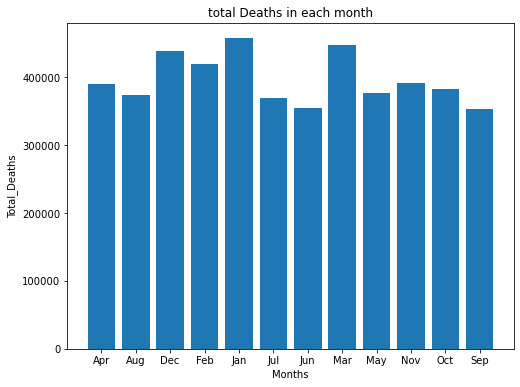

In [13]:
x=data1['month']
y=data1['deaths']
plt.figure(figsize=(8,6))
plt.bar(x,y);
plt.xlabel("Months")
plt.ylabel("Total_Deaths")
plt.title("total Deaths in each month");

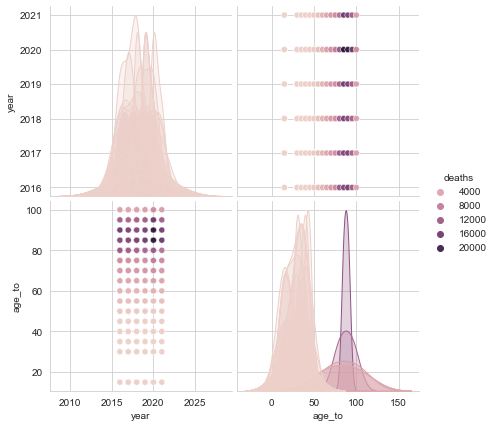

In [14]:
#Relation between diffrenet Columns with respect to deaths
sns.set_style('whitegrid')
sns.pairplot(data,hue='deaths',height=3)
plt.show()

In [15]:
deaths_per_age=data.groupby('age_to')['deaths'].sum()

In [16]:
deaths_per_age=deaths_per_age.to_frame().reset_index()

In [17]:
deaths_per_age

,age_to,deaths
0,15,17864.0
1,30,20419.0
2,35,13270.0
3,40,19378.0
4,45,28018.0
5,50,54970.0
6,55,110922.0
7,60,179378.0
8,65,245594.0
9,70,324187.0


# Plot between age and death

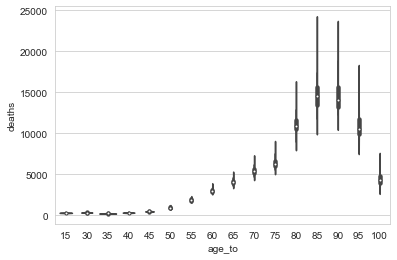

In [18]:
sns.violinplot(x='age_to',y='deaths',data=data)
plt.show()

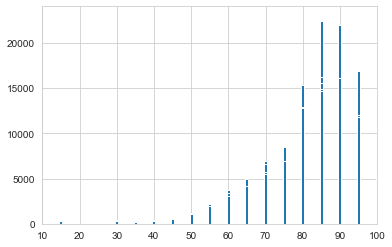

In [19]:
import pyfits
from matplotlib import pylab
from pylab import *
x = data['age_to'] 
y = data['deaths'] 
plt.bar(x,y)
plt.axis([10, 100, 0, 24000]);

From the above two graph it is evident that mortality increases drastically from age 80 onwardsbut after age 90 mortality rate starts decreasing